In [34]:
import polars as pl
import seaborn as sns

In [35]:
sns.set_style('whitegrid')

In [36]:
(pitching :=
 pl.read_csv('./data/pitching_ERA.csv')
)

yearID,lgID,league_wide_ERA,DH_rule
i64,str,f64,str
1973,"""AL""",4.301169,"""DH"""
1975,"""NL""",4.133216,"""No DH"""
2006,"""NL""",4.884903,"""No DH"""
2003,"""AL""",4.922077,"""DH"""
1991,"""NL""",4.117574,"""No DH"""
…,…,…,…
1978,"""NL""",4.019885,"""No DH"""
2011,"""NL""",4.170883,"""No DH"""
2004,"""NL""",4.689363,"""No DH"""


In [37]:
import polars as pl
ERA_pivot = pitching.pivot(
    values='league_wide_ERA',
    index='yearID',
    on='lgID'
)

ERA_pivot = ERA_pivot.with_columns(
    (pl.col('AL') - pl.col('NL')).alias('Difference')
)

pitching = pitching.join(ERA_pivot.select(['yearID', 'Difference']), on = 'yearID', how='left')

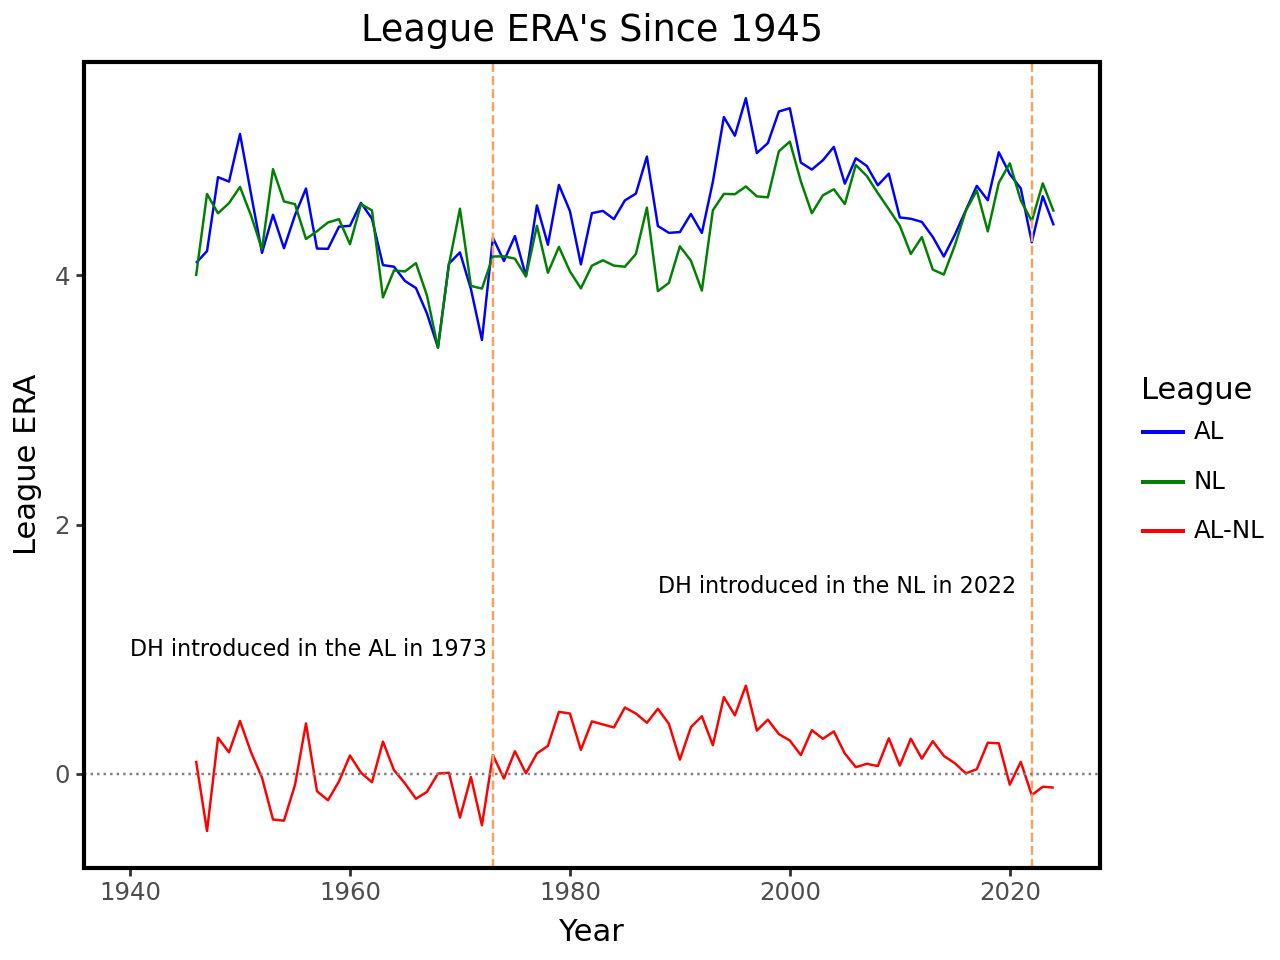

In [82]:
from plotnine import ggplot, geom_line, scale_color_manual, geom_vline, geom_text, labs, aes, annotate, theme_classic, theme, element_rect, ggtitle, geom_hline

pitching = pitching.with_columns(
    pl.lit('AL-NL').alias('Difference_Label')
)

(ggplot(data = pitching)
 + geom_line(aes(x = 'yearID',
                 y = 'league_wide_ERA',
                 fill='lgID',
                 color = 'lgID',
                )
            )
  + geom_line(aes(x = 'yearID',
                 y = 'Difference',
                 color = 'Difference_Label',
                ),
            )
  + scale_color_manual(name = 'League',
                       values = {'AL': 'blue',
                               'NL': 'green',
                               'AL-NL': 'red'})
 + geom_vline(xintercept=1973, linetype="dashed", color = "sandybrown")
 + geom_vline(xintercept=2022, linetype="dashed", color = "sandybrown")
 + annotate('text', 
            x=1940, 
            y=1,
            size = 8,
            label='DH introduced in the AL in 1973',
            ha='left' # 'ha' stands for horizontal alignment
           )
 + annotate('text', 
            x=1988, 
            y=1.5,
            size = 8,
            label='DH introduced in the NL in 2022',
            ha='left' # 'ha' stands for horizontal alignment
           )
 + theme_classic()
 + theme(
        panel_border=element_rect(
            color="black", fill=None, size=1.5
        )
    )
 + ggtitle("League ERA's Since 1945")
 + labs(
     x="Year",
     y="League ERA"
 )
  + geom_hline(yintercept=0, linetype="dotted", color="gray")
)

In [55]:
(batting :=
 pl.read_csv('./data/batting_SLG.csv')
)

yearID,lgID,league_wide_SLG,DH_rule
i64,str,f64,str
2021,"""NL""",0.406828,"""No DH"""
1973,"""NL""",0.375853,"""No DH"""
1988,"""AL""",0.390598,"""DH"""
1981,"""NL""",0.36393,"""No DH"""
2020,"""NL""",0.421171,"""No DH"""
…,…,…,…
1992,"""AL""",0.385005,"""DH"""
1982,"""NL""",0.372682,"""No DH"""
1973,"""AL""",0.38145,"""DH"""


In [56]:
import polars as pl
SLG_pivot = batting.pivot(
    values='league_wide_SLG',
    index='yearID',
    on='lgID'
)

SLG_pivot = SLG_pivot.with_columns(
    (pl.col('AL') - pl.col('NL')).alias('Difference')
)

batting = batting.join(SLG_pivot.select(['yearID', 'Difference']), on = 'yearID', how='left')

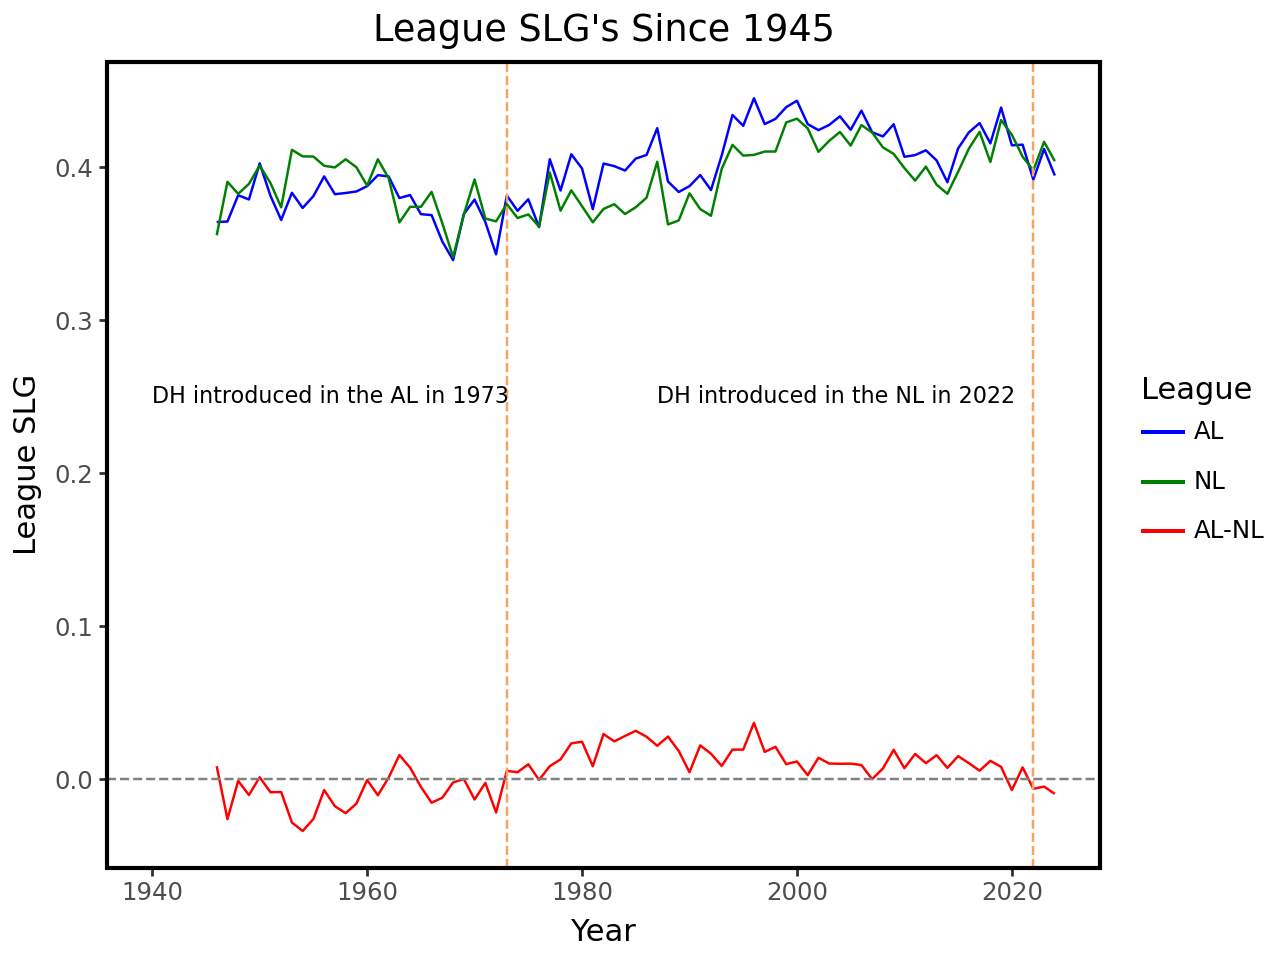

In [83]:
from plotnine import ggplot, scale_color_manual, geom_line, geom_vline, geom_text, labs, aes, annotate, theme_classic, theme, element_rect, ggtitle, geom_hline

batting = batting.with_columns(
    pl.lit('AL-NL').alias('Difference_Label')
)

(ggplot(data = batting)
 + geom_line(aes(x = 'yearID',
                 y = 'league_wide_SLG',
                 fill='lgID',
                 color = 'lgID',
                )
            )
  + geom_line(aes(x = 'yearID',
                 y = 'Difference',
                 color = 'Difference_Label'
                ),
            )
  + scale_color_manual(name = 'League',
                       values = {'AL': 'blue',
                               'NL': 'green',
                               'AL-NL': 'red'})
 + geom_vline(xintercept=1973, linetype="dashed", color = "sandybrown")
 + geom_vline(xintercept=2022, linetype="dashed", color = "sandybrown")
 + annotate('text', 
            x=1940, 
            y=0.25,
            size = 8,
            label='DH introduced in the AL in 1973',
            ha='left' # 'ha' stands for horizontal alignment
           )
 + annotate('text', 
            x=1987, 
            y=0.25,
            size = 8,
            label='DH introduced in the NL in 2022',
            ha='left' # 'ha' stands for horizontal alignment
           )
 + theme_classic()
  + theme(
        panel_border=element_rect(
            color="black", fill=None, size=1.5
        )
    )
 + ggtitle("League SLG's Since 1945")
 + labs(
     x="Year",
     y="League SLG"
 )
  + geom_hline(yintercept=0, linetype="dashed", color="gray")
)